In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score,cross_val_predict ,GridSearchCV, train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_selection import r_regression
from os import listdir
from os.path import isfile, join

pd.set_option('display.max_columns', None)

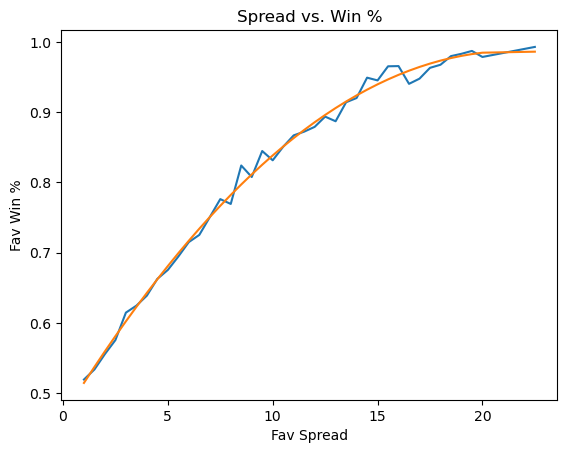

[-0.00112458  0.04837471  0.46721351]


In [80]:
# Spread to Win % Data taken from boydsbets.com, based on historical spread data
# This data is used to convert the models point spread predictions into the submission format
# Will be accomplished by linear regression using polyfit to extract predictions

# Want to fit y = Aln(x) + B

x = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11.5, 12, 12.5, 13, 13.5, 14, 14.5, 15, 15.5,
              16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5, 20, 22.5])
# , 20.5, 21, 21.5, 22,    , 23, 23.5, 24, 24.5
y = np.array([0.5193, 0.5336, 0.5556, 0.5755, 0.6146, 0.6245, 0.6388, 0.6627, 0.6754, 0.6945, 0.7151, 0.7253, 0.7506, 0.7763, 0.7694, 0.8242, 
              0.8078, 0.8448, 0.8316, 0.8509, 0.8671, 0.8724, 0.8792, 0.8938, 0.8872, 0.9143, 0.9203, 0.9493, 0.9454, 0.9655, 0.9658, 0.9405,
              0.9479, 0.9633, 0.9677, 0.9800, 0.9833, 0.9874, 0.9788, 0.9931])
# 0.9751, 0.9727, 0.9706, 0.9786,   , 0.9919, 0.9910, 0.9912, 0.9818
plt.plot(x, y)
plt.xlabel("Fav Spread")
plt.ylabel("Fav Win %")
plt.title("Spread vs. Win %")
# plt.show()

coeffs = np.polyfit(x, y, 2)
a = coeffs[0]
b = coeffs[1]
c = coeffs[2]

y_fitted = a*x**2 + b*x +c
plt.plot(x, y_fitted)
plt.show()

print(coeffs)

In [8]:
dirname = './data/'


df_MSeason = pd.read_csv(dirname + 'MRegularSeasonDetailedResults.csv')
df_WSeason = pd.read_csv(dirname + 'WRegularSeasonDetailedResults.csv')

SampleSubmission = pd.read_csv(dirname + 'SampleSubmissionStage1.csv')

In [46]:
df_MSeason.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14


In [86]:
df_MSeason["WDiff"] = df_MSeason["WScore"] - df_MSeason["LScore"]
df_MSeason

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WDiff
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,6
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,7
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23,12
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23,6
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116718,2025,85,1401,75,1328,68,H,0,21,56,4,24,29,35,20,24,9,7,2,13,21,21,44,10,22,16,22,2,16,19,8,6,10,25,7
116719,2025,85,1405,86,1325,83,A,0,34,64,7,16,11,19,8,29,15,2,5,8,20,31,69,8,19,13,17,7,25,11,4,1,5,15,3
116720,2025,85,1428,69,1153,66,H,0,26,49,5,13,12,17,8,28,16,4,6,19,19,22,56,8,22,14,22,6,15,11,12,5,6,17,3
116721,2025,85,1444,74,1123,71,A,0,28,58,6,14,12,17,7,20,13,5,5,8,22,25,57,6,21,15,24,14,21,11,1,4,12,15,3


In [106]:
df_M_Data = df_MSeason.drop(columns=["Season", "DayNum", "WTeamID", "LTeamID", "WScore", "LScore", "WLoc", "NumOT"])

In [120]:
# Transpose W L to team 1 2. Randomly flip 50% of teams 1 and 2 so that 1diff can take on negative values
df_M_Data.columns = ['1FGM', '1FGA', '1FGM3', '1FGA3', '1FTM', '1FTA', '1OR', '1DR', '1Ast', '1TO', '1Stl', '1Blk', '1PF',
                     '2FGM', '2FGA', '2FGM3', '2FGA3', '2FTM', '2FTA', '2OR', '2DR', '2Ast', '2TO', '2Stl', '2Blk', '2PF']

    rng = np.random.default_rng()
    random_float = rng.random()

In [217]:
#Train Test Split
X = df_MSeason_plt.iloc[:, :-1]
y = df_MSeason_plt.iloc[:, -1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Index(['WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst',
       'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM',
       'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'],
      dtype='object')

In [178]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_scaled, columns=X_train.columns)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [148]:
from sklearn.ensemble import RandomForestRegressor

# Train random forest and get feature importances
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train.values.ravel())
importances = model.feature_importances_

feature_importances = pd.Series(importances, index=X_train.columns)
print(feature_importances.sort_values(ascending=False))

WFGM     0.327041
LFGM     0.308343
LFTM     0.101078
WFTM     0.092453
WFGM3    0.047488
LFGM3    0.038306
WFTA     0.007476
WAst     0.007224
WFGA3    0.006792
LFTA     0.006356
LFGA3    0.005609
LAst     0.004597
LDR      0.004522
WDR      0.004127
WPF      0.003567
LPF      0.003529
LTO      0.003522
WFGA     0.003455
LFGA     0.003352
LOR      0.003327
WOR      0.003315
WTO      0.003189
WStl     0.003110
WBlk     0.002897
LStl     0.002822
LBlk     0.002505
dtype: float64


In [180]:
selected_features = ["WFGM", "LFGM", "LFTM", "WFTM", "WFGM3", "LFGM3"]
X_train_selected = X_train_scaled[selected_features]
X_test_selected = X_test_scaled[selected_features]

In [172]:
X_test_scaled = scaler.transform(X_test)

In [168]:
final_model = RandomForestRegressor()
model.fit(X_train_selected, y_train.values.ravel())

RandomForestRegressor()

In [184]:
predictions = model.predict(X_test_selected)

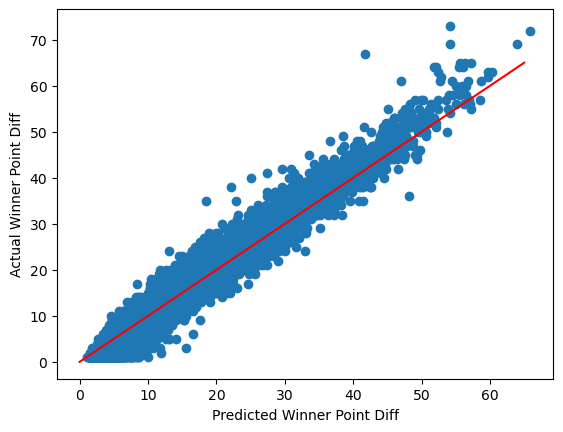

<Figure size 1200x1200 with 0 Axes>

RMSE = 1.6500526575654957


In [210]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

rmse = root_mean_squared_error(y_test, predictions)

plt.scatter(predictions, y_test)
plt.xlabel("Predicted Winner Point Diff")
plt.ylabel("Actual Winner Point Diff")

x = np.array([0, 65])
y = x
plt.plot(x, y, color='red')
plt.figure(figsize=(12,12))

plt.show()
print("RMSE = " + str(rmse))

In [38]:
# Strategy
#
# Step 1
#
# Create Average Stats for each team from M/WRegularSeasonDetailedResultsCSV
# Store stats for each team in a dataframe ordered by teamID
#
# Step 2
#
# Feature Selection on complete dataset
#
# Step 3
#
# Build model from dataset to predict winners of games
# Predict and create Submission File

In [ ]:
#